### Including Libararies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Load iris flower dataset 

*   It consist of three categories:
    1.   setosa
    2.   versicolor
    3.   virginica

*   Number of instances : 150 

*   Number of attributes : 4

The dataset can be downloaded seperately from the [website](https://archive.ics.uci.edu/ml/datasets/iris)







In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

### Understanding dataset 

In [3]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
# Creating a DataFrame of given iris dataset.
#import pandas as pd
df=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
df.head(10)    # return the first n rows (default : 5)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [5]:
#statics of data
df.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.shape

(150, 5)

In [7]:
#Check null values
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [8]:
df.info() #information of datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

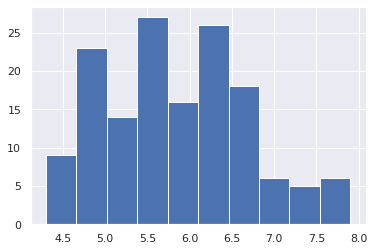

In [ ]:
 df['sepal length'].hist()
# Range of value(x) to the corresponding range of count(y)

<AxesSubplot:>

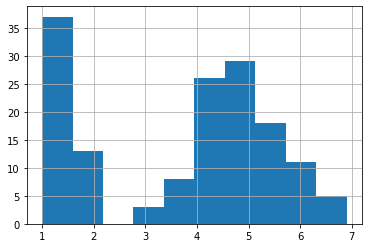

In [10]:
df['petal length'].hist()

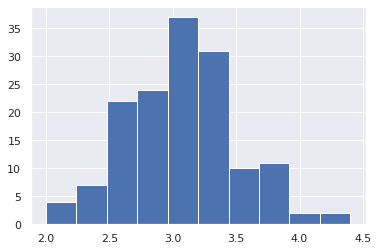

In [ ]:
df['sepal width'].hist()

<AxesSubplot:>

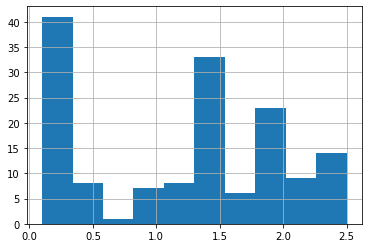

In [11]:
df['petal width'].hist()

In [12]:
colors = ['red','purple','orange']
species = ['setosa', 'versicolor', 'virginica'] 

In [13]:
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

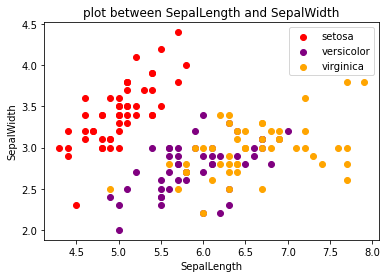

In [14]:
for i in range(3):
    x=df[df['species'] == i]
    plt.scatter(x['sepal length'],x['sepal width'],c=colors[i],label = species[i])
plt.title('plot between SepalLength and SepalWidth')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

setosa is a different class than other two and the sepal width is starting from 3cm to maximum of 4.4cm

virginicia is overlapping with versicolor from the sepal length 6cm to 7cm

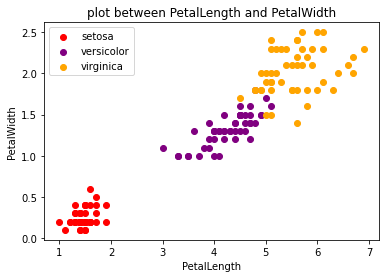

In [15]:
for i in range(3):
    x=df[df['species'] == i]
    plt.scatter(x['petal length'],x['petal width'],c=colors[i],label = species[i])
plt.title('plot between PetalLength and PetalWidth')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(df)

# This function was introduced and explained in the following paper:
# Van der Maaten, Laurens, and Geoffrey Hinton. "Visualizing data using t-SNE." Journal of machine learning research 9.11 (2008).

<AxesSubplot:>

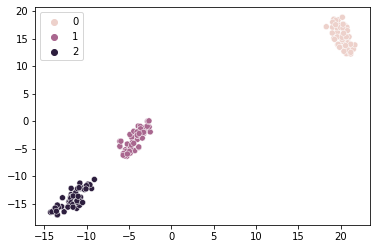

In [17]:
#import seaborn as sns
sns.scatterplot(X_2d[:,0], X_2d[:,1], hue= iris.target)

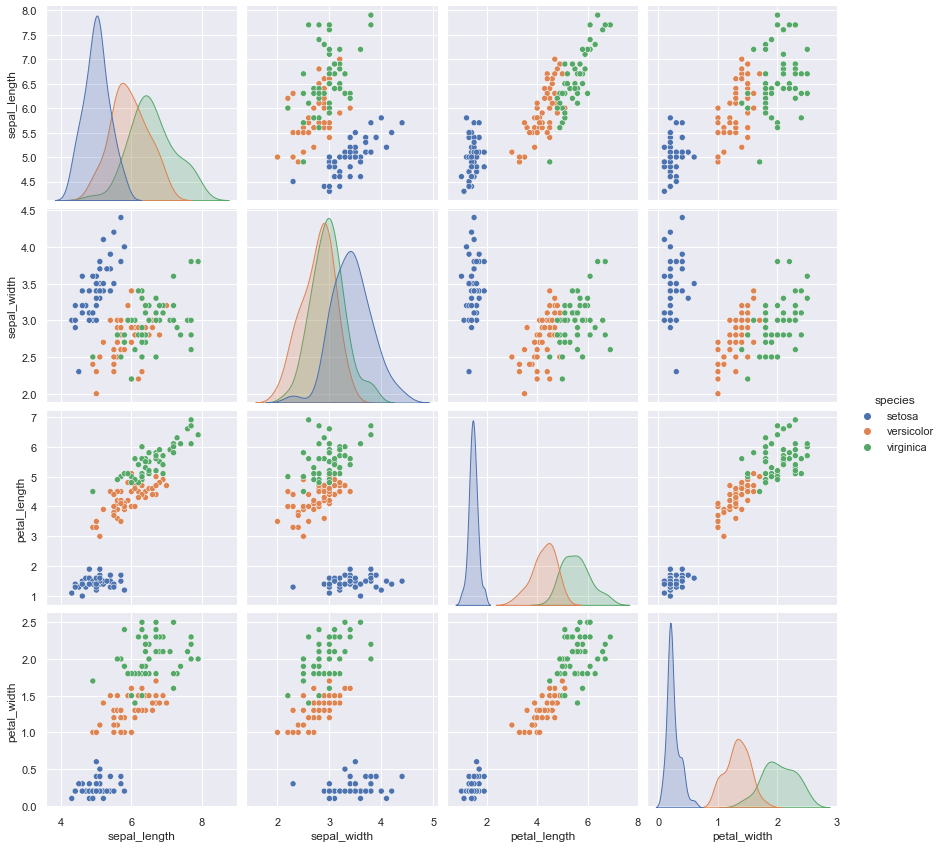

In [20]:
import seaborn as sns
iris = sns.load_dataset('iris')
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=3);

Coorelation Matrix

In [18]:
df.corr()

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

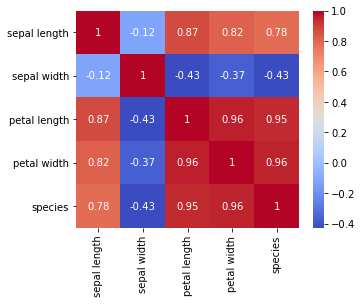

In [19]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot = True,ax=ax,cmap = 'coolwarm')

### Data Split 

In [20]:
from sklearn.model_selection import train_test_split
#train
#test
x= df.drop(columns=['species'])
y= df['species']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=1)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### KNN Algorithm

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
pred= knn.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(pred, y_test))

[[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]


In [24]:
accuracy_knn = knn.score(x_test,y_test)*100
print("KNN Accuracy is:",accuracy_knn)

KNN Accuracy is: 97.77777777777777


### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier 
d_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)  
d_tree.fit(x_train, y_train)
y_pred= d_tree.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [28]:
accuracy_d_tree = d_tree.score(x_test,y_test)*100
print("Decision Tree Accuracy is:",accuracy_d_tree)

Decision Tree Accuracy is: 95.55555555555556


### Support Vector Machine


In [29]:
from sklearn.svm import SVC
svm = SVC(kernel="linear",random_state =0)  
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test) 

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]


In [31]:
accuracy_svm = svm.score(x_test,y_test)*100
print("The accuracy OF Support vector :",accuracy_svm)

The accuracy OF Support vector : 100.0


### Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [33]:
pred= clf.predict(x_test)
print(confusion_matrix(y_pred, y_test))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [33]:
accuracy_rf = clf.score(x_test, y_test)*100
print("Accuracy:", accuracy_rf)

Accuracy: 95.55555555555556


### Summary 

In [34]:
from prettytable import PrettyTable
Table = PrettyTable(["Algorithm", "Accuracy"])
Table.add_row(["KNN", accuracy_knn])
Table.add_row(["Decision Tree", accuracy_d_tree])
Table.add_row(["SVM", accuracy_svm])
Table.add_row(["Random Forest Classifier", accuracy_rf])
print(Table)

+--------------------------+-------------------+
|        Algorithm         |      Accuracy     |
+--------------------------+-------------------+
|           KNN            | 97.77777777777777 |
|      Decision Tree       | 95.55555555555556 |
|           SVM            |       100.0       |
| Random Forest Classifier | 95.55555555555556 |
+--------------------------+-------------------+


In [35]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\net\anaconda3\python.exe -m pip install --upgrade pip' command.
